<a href="https://colab.research.google.com/github/scottdono/CompSci_Year4/blob/main/Env_Analytics_C17325426.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmental Analytics Visualisation Assignment
## Semester 2, 2020-21
## Scott Donnelly - C17325426

Objective:

Find appropriate datasets
Apply analysis techniques
Visualise results and publish
The purpose of this assignment is to apply the data analysis techniques that we have learnt in class together and apply them to a novel dataset.

************

**Comparison of Covid-19 Deaths and cases in Ireland and the UK**

##Mount to Drive with datasets

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import and install all necessary modules

In [35]:
!pip install geopandas
!pip install descartes

import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt


##Load the shapefile for Covid-19 cases across Ireland

In [36]:
print("loading shapefile...")

shapefile = gpd.read_file("/content/drive/MyDrive/EnvAnal/data_share/data_share/Covid19CountyStatisticsHPSCIreland.shp")
shapefile.head()

loading shapefile...


,OBJECTID,ORIGID,CountyName,Population,TimeStamp,IGEasting,IGNorthing,Lat,Long,UGI,ConfirmedC,Populati_1,Confirme_1,Confirme_2,Shape__Are,Shape__Len,geometry
0,1,1,Carlow,56932,2020-02-27,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,None,None,2.432352e+09,3.193486e+05,"POLYGON ((-749957.339 6967428.451, -747151.990..."
1,2,2,Cavan,76176,2020-02-27,246380,304501,53.9878,-7.2937,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,None,None,5.575010e+09,5.159545e+05,"POLYGON ((-884805.619 7228050.759, -875212.779..."
2,3,3,Clare,118817,2020-02-27,133493,182732,52.8917,-8.9889,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,None,None,8.722542e+09,1.013949e+06,"MULTIPOLYGON (((-1002911.648 7009087.886, -100..."
3,4,4,Cork,542868,2020-02-27,156242,77860,51.9517,-8.6372,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,None,None,1.952949e+10,2.129949e+06,"MULTIPOLYGON (((-947249.903 6781102.592, -9517..."
4,5,5,Donegal,159192,2020-02-27,202615,405691,54.8989,-7.9600,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,None,None,1.462404e+10,2.145086e+06,"MULTIPOLYGON (((-806328.750 7449847.812, -8063..."


##Map of Ireland with Confirmed Cases

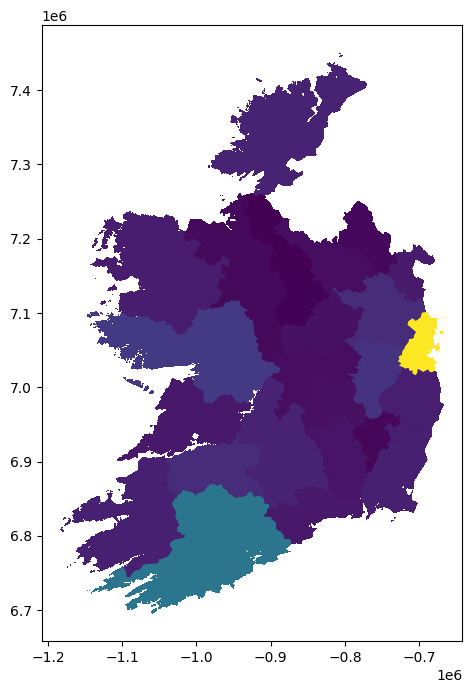

In [39]:
shapefile.plot(column='ConfirmedC', figsize=(16,8))

Trying to visualise the differences in Covid19 outbreak between Ireland and the UK

As you can see. The data that I took from https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases needs to be processed more.

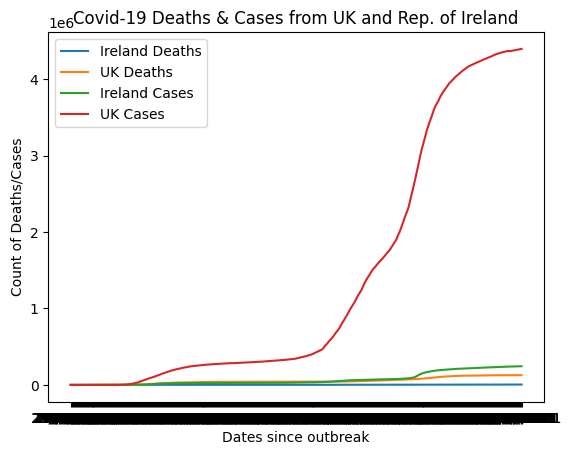

In [22]:
plt.rcdefaults()

data = pd.read_csv('/content/drive/MyDrive/EnvAnal/data_share/data_share/IrelandUKCovid19CasesDeaths(1).csv')

data

date = data['Date']
IrelandDeath = data['Ireland (Deaths)']
UKDeath = data['United Kingdom (Deaths)']
IrelandCases = data['Ireland (Cases)']
UKCases = data['United Kingdom (Cases)']

plt.plot(date, IrelandDeath, label='Ireland Deaths')
plt.plot(date, UKDeath, label='UK Deaths')
plt.plot(date, IrelandCases, label='Ireland Cases')
plt.plot(date, UKCases, label='UK Cases')

plt.legend()
plt.title("Covid-19 Deaths & Cases from UK and Rep. of Ireland")
plt.xlabel("Dates since outbreak")
plt.ylabel("Count of Deaths/Cases")

plt.savefig("Covid19IrelandUK.png")

plt.show()


The visualisation above can't fit in all the dates so it would be better to just changes them to the number of days. It may also be better to have one graph for deaths and one graph for cases.


In [31]:
data_modified = pd.read_csv('/content/drive/MyDrive/EnvAnal/data_share/data_share/IrelandUKCovid19CasesDeathsModified.csv')

data_modified


,Days,Ireland (Deaths),United Kingdom (Deaths),Ireland (Cases),United Kingdom (Cases)
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0
...,...,...,...,...,...
451,452,4835,127260,243238,4385938
452,453,4836,127270,243508,4387820
453,454,4836,127274,243911,4390783
454,455,4847,127307,244297,4393307


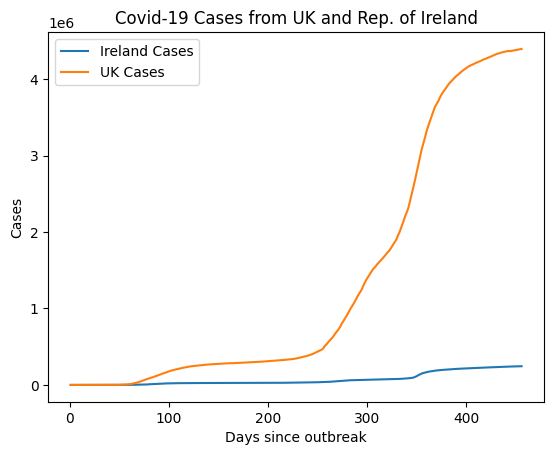

In [33]:
days = data_modified['Days']
IrelandDeath = data_modified['Ireland (Deaths)']
UKDeath = data_modified['United Kingdom (Deaths)']
IrelandCases = data_modified['Ireland (Cases)']
UKCases = data_modified['United Kingdom (Cases)']

plt.plot(days, IrelandCases, label='Ireland Cases')
plt.plot(days, UKCases, label='UK Cases')

plt.legend()
plt.title("Covid-19 Cases from UK and Rep. of Ireland")
plt.xlabel("Days since outbreak")
plt.ylabel("Cases per hundred thousand")

plt.savefig("Covid19IrelandUKCases.png")

plt.show()

When we try to compare the number of cases between the UK and Ireland it seems as if Ireland has barely had any cases at all

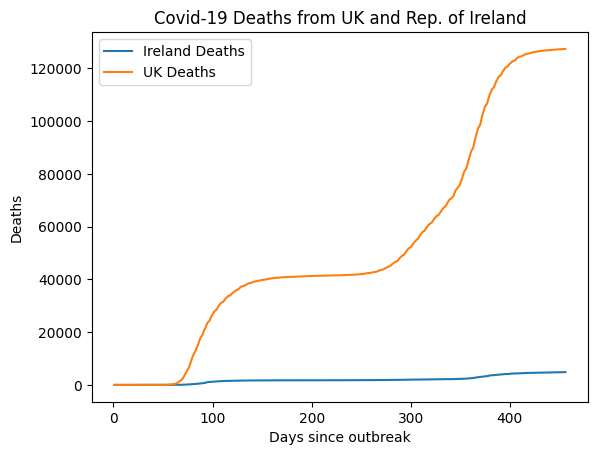

In [32]:
plt.plot(days, IrelandDeath, label='Ireland Deaths')
plt.plot(days, UKDeath, label='UK Deaths')
plt.legend()
plt.title("Covid-19 Deaths from UK and Rep. of Ireland")
plt.xlabel("Days since outbreak")
plt.ylabel("Deaths")

plt.savefig("Covid19IrelandUKDeaths.png")

plt.show()

The comparison is even more dramatic when we look at the deaths between both countries. Obviously population plays a primary role in this but the shape of the graphs are very different so there must be other factors withing the population or the environment that caused these differences

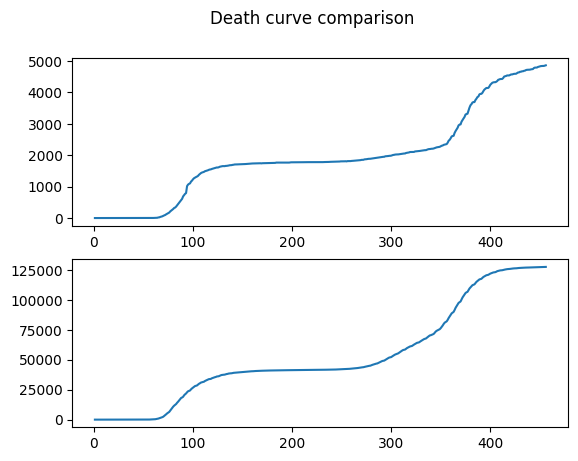

In [41]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Death curve comparison')
ax1.plot(days, IrelandDeath)
ax2.plot(days, UKDeath)

What we find upon closer inspection is that the death curve is identical when you scale them correctly next to each other